In [ ]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1. Load library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from dataprep.eda import create_report
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier, cv
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## 2. Read data and visualization

In [ ]:
tr = pd.read_csv('Train.csv')
tr.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


> Using dataprep package, We can check basic data EDA

DataPrep Report
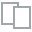
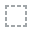
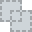
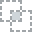
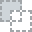
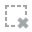
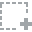
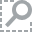
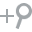
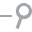
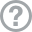
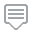
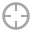
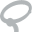
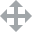
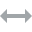
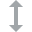
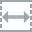
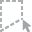
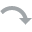
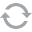
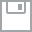
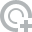
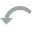
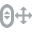
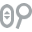
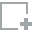
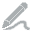
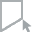
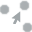
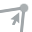
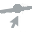

In [ ]:
create_report(tr)

In [ ]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
import matplotlib.pyplot as plt

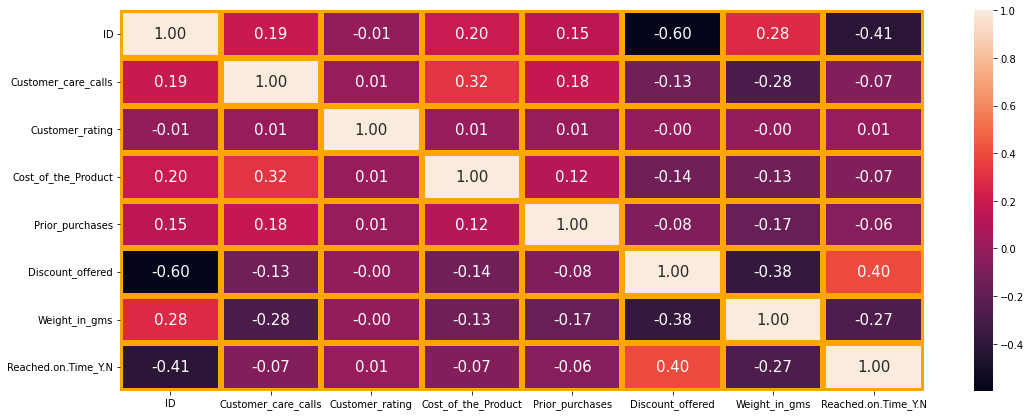

In [ ]:
plt.figure(figsize = (18, 7))
sns.heatmap(tr.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 5, linecolor = 'orange')
plt.show()

Inference:

**Conclusions from Correlation matrix :-**

Discount Offered have high positive correlation with Reached on Time or Not of 40%.

Weights in gram have negative correlation with Reached on Time or Not -27%.

Discount Offered and weights in grams have negative correlation -38%.

Customer care calls and weights in grams havenegative correlation -28%.

Customer care calls and cost of the product have positive correlation of 32%.

Prior Purchases and Customer care calls have slightly positive correlation.

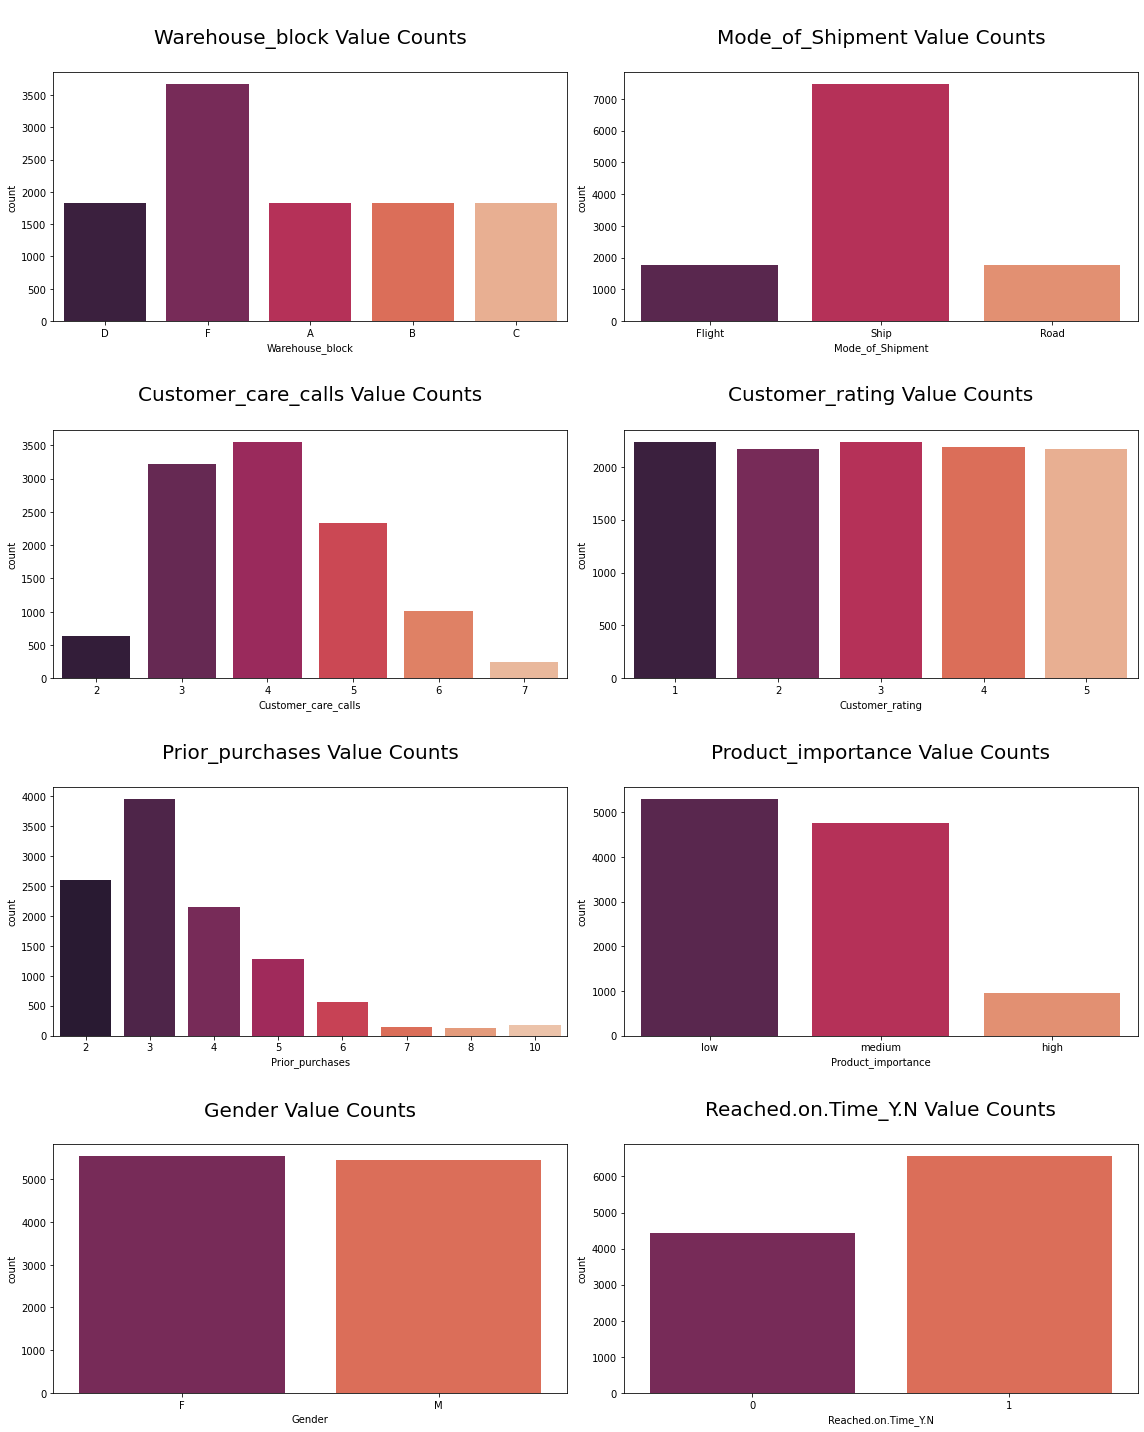

In [ ]:
cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']

plt.figure(figsize = (16, 20))
plotnumber = 1

# plotting the countplot of each categorical column.

for i in range(len(cols)):
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.countplot(x = cols[i], data = tr, ax = ax, palette='rocket')
        plt.title(f"\n{cols[i]} Value Counts\n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

Inference:

**From the above plots, we can conclude following:-**

Warehouse block F have has more values than all other Warehouse blocks.

In mode of shipment columns we can clearly see that ship delivers the most of products to the customers.

Most of the customers calls 3 or 4 times to the customer care centers.

Customer Ratings does not have much variation.

Most of the customers have 3 prior purchases.

We can say that mopst of the products are of low Importance.

Gender Column doesn't have much variance.

More products doesn't reach on time than products reached on time.

**Reached on time delivery**

In [ ]:
# creating a list of continuous columns

integer_columns = tr.select_dtypes(include = ['int64'])
integer_columns.head()

reached_on_time_y_n = integer_columns['Reached.on.Time_Y.N'].value_counts().reset_index()
reached_on_time_y_n.columns = ['Reached.on.Time_Y.N', 'value_counts']
fig = px.pie(reached_on_time_y_n, names = 'Reached.on.Time_Y.N', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.Darkmint_r, width = 650, height = 400,
            hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

**COST OF THE PRODUCT**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



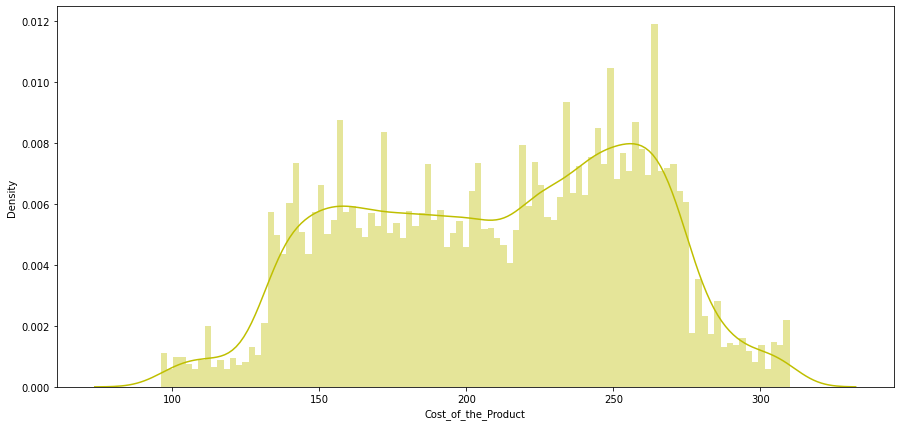

In [ ]:
# making a distplot of cost of the product column

plt.figure(figsize = (15, 7))
ax = sns.distplot(tr['Cost_of_the_Product'], bins = 100, color = 'y')

plt.show()

In [ ]:
# looking at the relation between cost of the product and whether the product reached on time or not using boxplot

px.box(data_frame = tr, x = 'Reached.on.Time_Y.N', y = 'Cost_of_the_Product', 
       color = 'Reached.on.Time_Y.N', template = 'plotly_dark')

**DISCOUNT OFFERED**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



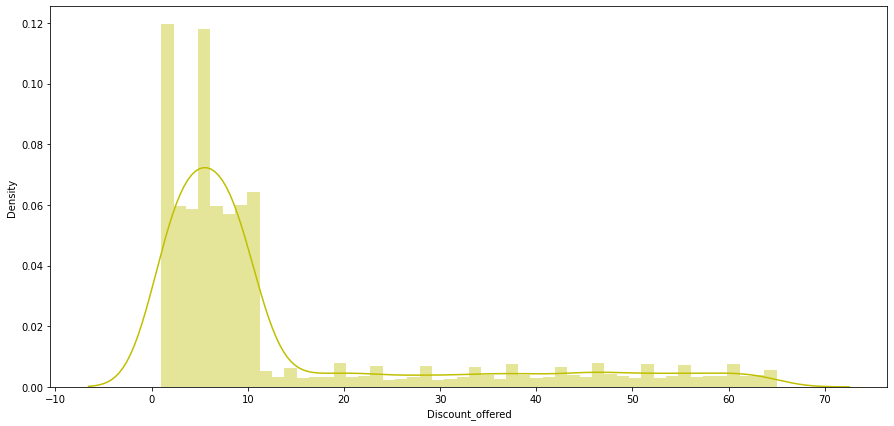

In [ ]:
# making a distplot of discount offered column

plt.figure(figsize = (15, 7))
ax = sns.distplot(tr['Discount_offered'], color = 'y')

plt.show()

In [ ]:
# looking at the relation between discount offered and whether the product reached on time or not using boxplot

px.box(data_frame = tr, x = 'Reached.on.Time_Y.N', y = 'Discount_offered', 
       color = 'Reached.on.Time_Y.N', template = 'plotly_dark')

**Weight in gms**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



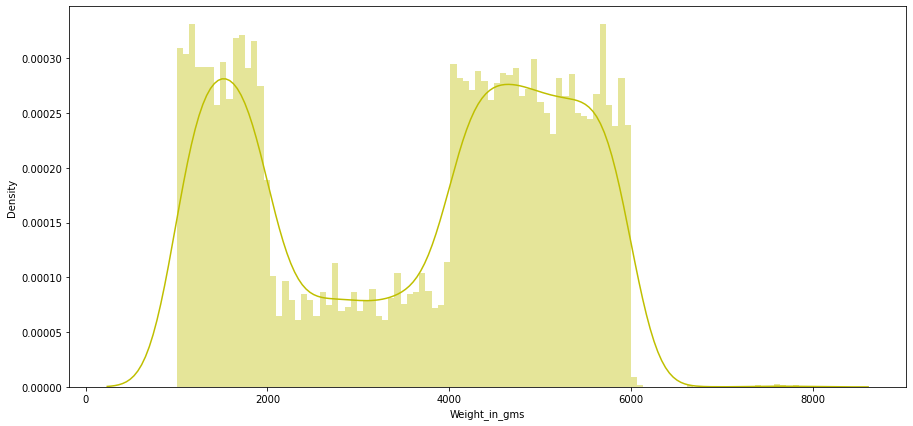

In [ ]:
# making a distplot of weights in gram column

plt.figure(figsize = (15, 7))
ax = sns.distplot(tr['Weight_in_gms'], bins = 100, color = 'y')

plt.show()

In [ ]:
# looking at the relation between weights in grams and whether the product reached on time or not using boxplot\

px.box(data_frame = tr, x = 'Reached.on.Time_Y.N', y = 'Weight_in_gms', 
       color = 'Reached.on.Time_Y.N', template = 'plotly_dark')

**Which type of warehouse contains most weights?**

In [ ]:
# creating a dataframe of warehouse block and weights in gram columns 

ware_block_weight = tr.groupby(['Warehouse_block'])['Weight_in_gms'].sum().reset_index()
ware_block_weight

,Warehouse_block,Weight_in_gms
0,A,6627118
1,B,6664240
2,C,6674560
3,D,6655305
4,F,13349327


In [ ]:
# checking which type of warehouse contains the most weights 

px.histogram(data_frame = tr, x = 'Weight_in_gms', nbins = 100, color = 'Warehouse_block',
             marginal = 'box', template = 'plotly_dark')

**Inference:**Warehouse F contains most weights

Effect of Warehouse on Cost of the Product

In [ ]:
warehouse_weight = tr.groupby(['Warehouse_block'])['Cost_of_the_Product'].sum().reset_index()
warehouse_weight

,Warehouse_block,Cost_of_the_Product
0,A,382671
1,B,388888
2,C,387114
3,D,386805
4,F,766477


In [ ]:

px.histogram(data_frame = tr, x = 'Cost_of_the_Product', nbins = 100, color = 'Warehouse_block',
             marginal = 'box', template = 'plotly_dark')

**Inference:Products from warehouse F have the high costs.**

**Does Mode of Shipment effect Cost of Product ?**

In [ ]:
mode_shipment_cost = tr.groupby(['Mode_of_Shipment'])['Cost_of_the_Product'].sum().reset_index()
mode_shipment_cost

,Mode_of_Shipment,Cost_of_the_Product
0,Flight,371938
1,Road,370437
2,Ship,1569580


In [ ]:
px.histogram(data_frame = tr, x = 'Cost_of_the_Product', nbins = 100, color = 'Mode_of_Shipment',
             marginal = 'box', template = 'plotly_dark')

**Does Customer calls effect Ratings ?**

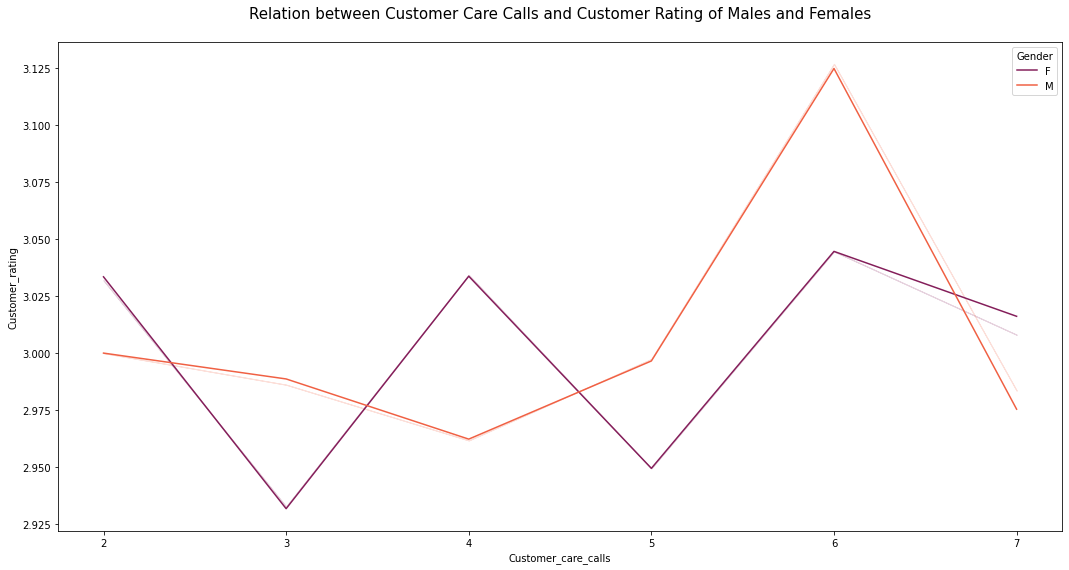

In [ ]:
plt.figure(figsize = (18, 9))
sns.lineplot(x = 'Customer_care_calls', y = 'Customer_rating', hue = 'Gender', data = tr,
             palette = 'rocket', ci = 0)
plt.title('Relation between Customer Care Calls and Customer Rating of Males and Females\n',
          fontsize = 15)
plt.show()

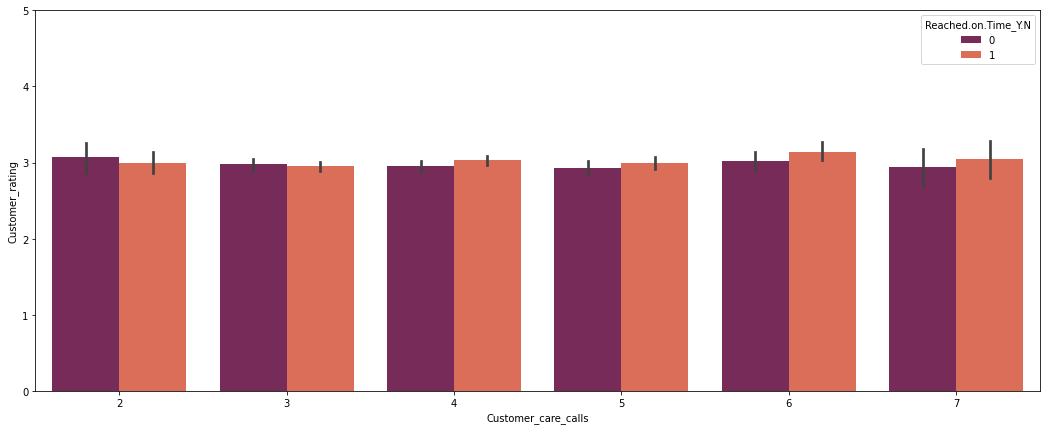

In [ ]:
plt.figure(figsize = (18, 7))
sns.barplot(x = 'Customer_care_calls', y = 'Customer_rating', hue = 'Reached.on.Time_Y.N', data = tr, palette = 'rocket')
plt.ylim(0, 5)
plt.show()

**Inference:Customers calls were more when the product doesn't reach on time and when the product reaches at time then the calls were less.**

**Relation Between Product Importance and Discount Offered**

In [ ]:
px.box(data_frame = tr, x = 'Product_importance', y ='Discount_offered', color = 'Product_importance',
       template = 'plotly_dark')

In [ ]:
# making boxplot between product importance and discount offered and whether or not the product will reach on time or not
# to see that is there any relation between them .

px.box(data_frame = tr, x = 'Product_importance', y ='Cost_of_the_Product', color = 'Reached.on.Time_Y.N',
       template = 'plotly_dark')

**Products of high importance were offered higher discounts.**

## 3. Data preprocessing

In [ ]:
tr = tr.iloc[:,1:]

In [ ]:
sc = StandardScaler()
tr.iloc[:,[2,3,4,5,8,9]] = sc.fit_transform(tr.iloc[:,[2,3,4,5,8,9]])

In [ ]:
tr_dum = pd.get_dummies(tr.iloc[:,:-1])

In [ ]:
train = pd.concat([tr_dum,tr.iloc[:,-1]], axis='columns')

In [ ]:
train.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M,Reached.on.Time_Y.N
0,-0.047711,-0.700755,-0.690722,-0.372735,1.889983,-1.468240,0,0,0,1,0,1,0,0,0,1,0,1,0,1
1,-0.047711,1.421578,0.120746,-1.029424,2.815636,-0.333893,0,0,0,0,1,1,0,0,0,1,0,0,1,1
2,-1.799887,-0.700755,-0.565881,0.283954,2.136824,-0.159002,1,0,0,0,0,1,0,0,0,1,0,0,1,1
3,-0.923799,0.006689,-0.711529,0.283954,-0.208162,-1.502484,0,1,0,0,0,1,0,0,0,0,1,0,1,1
4,-1.799887,-0.700755,-0.545074,-0.372735,2.013404,-0.703244,0,0,1,0,0,1,0,0,0,0,1,1,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,:-1], train.iloc[:,-1], random_state=123, stratify=train.iloc[:,-1], test_size=0.3)

## 4. Modeling

### 4-1. XGBoost

In [ ]:
xgb = XGBClassifier(n_estimators=20, learning_rate=0.1, max_depth=50, use_label_encoder=False,objective = "binary:hinge")
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
Acc_score = accuracy_score(pred, y_test)
F1_score = f1_score(pred, y_test)
Precision_score = precision_score(pred, y_test)
print("Acc score : {:.2f}".format(Acc_score))
print("F1 score : {:.2f}".format(F1_score))
print("Precision score : {:.2f}".format(Precision_score))

Acc score : 0.66
F1 score : 0.71
Precision score : 0.72


### 4-2. Randomforest with GridSearchCV

In [ ]:
rf = RandomForestClassifier()
rf_param_grid = {'n_estimators' : list(range(5,16)), 'max_depth' : list(range(5,16))}
rf_grid = GridSearchCV(estimator=rf,
                      param_grid=rf_param_grid,
                      scoring='accuracy',
                      cv=4,
                      return_train_score=True)

rf_grid.fit(train.iloc[:, :-1],train.iloc[:,-1])

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                          15]},
             return_train_score=True, scoring='accuracy')

In [ ]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
rf_grid.best_params_

{'max_depth': 15, 'n_estimators': 5}

In [ ]:
rf_best = RandomForestClassifier(max_depth=15, n_estimators=5)
rf_best.fit(train.iloc[:, :-1],train.iloc[:,-1])

RandomForestClassifier(max_depth=15, n_estimators=5)

In [ ]:
pred = rf_best.predict(train.iloc[:, :-1])

## 5. Result(Confusion matrix)

89.0 %


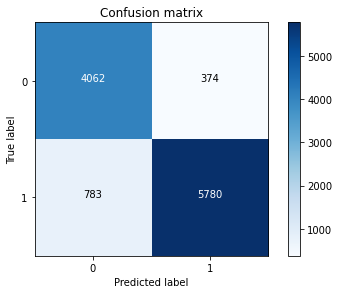

In [ ]:
cnf_matrix_tra = confusion_matrix(train.iloc[:,-1], pred)
print(round(accuracy_score(train.iloc[:,-1], pred),2)*100, '%')

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()